In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('italy-covid-daywise.csv')

In [4]:
df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


Basic Visulization using Pandas Library

<AxesSubplot:>

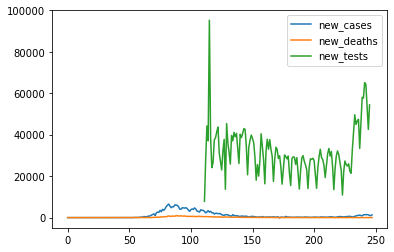

In [6]:
df.plot()

The entire dataframe can be called with plot().

Plot() recogizes the numerical features in a dataset and plots it with a common scale

Single feature can also be called using plot()

<AxesSubplot:>

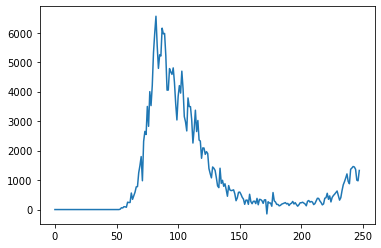

In [9]:
df.new_cases.plot()

Plot() plots a line graph

THe plot shows the overall trend. But its difficult to tell when the peak happened.

For that we should convert the date column as index

In [10]:
df.set_index('date',inplace =True)

In [11]:
df

,new_cases,new_deaths,new_tests
date,,,
2019-12-31,0.0,0.0,NaN
2020-01-01,0.0,0.0,NaN
2020-01-02,0.0,0.0,NaN
2020-01-03,0.0,0.0,NaN
2020-01-04,0.0,0.0,NaN
...,...,...,...
2020-08-30,1444.0,1.0,53541.0
2020-08-31,1365.0,4.0,42583.0
2020-09-01,996.0,6.0,54395.0


<AxesSubplot:xlabel='date'>

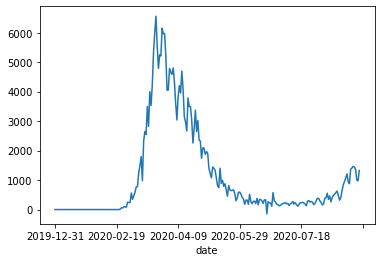

In [12]:
df.new_cases.plot()

The human brain can process the above image precisely.

It can be seen that the peak occured during Feb-Mar 2020

We can also combine more than one feature.

<AxesSubplot:xlabel='date'>

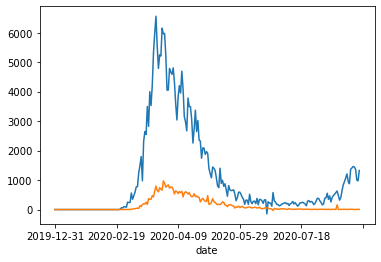

In [15]:
df.new_cases.plot()
df.new_deaths.plot()

In [20]:
df['total_cases'] = df.new_cases.cumsum()

In [21]:
df['total_deaths'] = df.new_deaths.cumsum()

In [22]:
df

,new_cases,new_deaths,new_tests,total_cases,total_deaths
date,,,,,
2019-12-31,0.0,0.0,NaN,0.0,0.0
2020-01-01,0.0,0.0,NaN,0.0,0.0
2020-01-02,0.0,0.0,NaN,0.0,0.0
2020-01-03,0.0,0.0,NaN,0.0,0.0
2020-01-04,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...
2020-08-30,1444.0,1.0,53541.0,266853.0,35473.0
2020-08-31,1365.0,4.0,42583.0,268218.0,35477.0
2020-09-01,996.0,6.0,54395.0,269214.0,35483.0


<AxesSubplot:xlabel='date'>

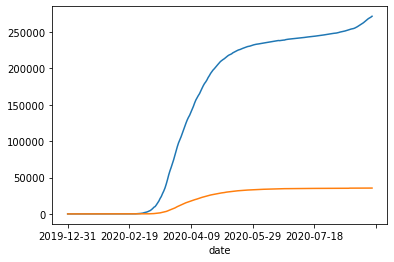

In [25]:
df.total_cases.plot()
df.total_deaths.plot()

Creating a variable that is used to plot

In [23]:
death_rate = df.total_deaths / df.total_cases

<AxesSubplot:title={'center':'Death Rate'}, xlabel='date'>

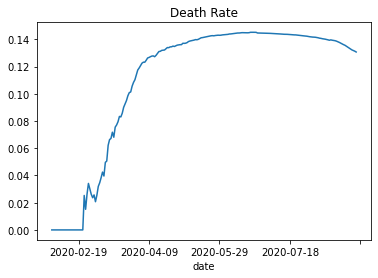

In [24]:
death_rate.plot(title='Death Rate')

The process includes:

*Creating a new feature that is a cumulative sum

*Create a variable that stores a mathematical operation between the two new feature

*Plotting the variable with a title

Plotting month wise data

In [31]:
df.reset_index(inplace=True)

In [32]:
df

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths
0,2019-12-31,0.0,0.0,NaN,0.0,0.0
1,2020-01-01,0.0,0.0,NaN,0.0,0.0
2,2020-01-02,0.0,0.0,NaN,0.0,0.0
3,2020-01-03,0.0,0.0,NaN,0.0,0.0
4,2020-01-04,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,266853.0,35473.0
244,2020-08-31,1365.0,4.0,42583.0,268218.0,35477.0
245,2020-09-01,996.0,6.0,54395.0,269214.0,35483.0
246,2020-09-02,975.0,8.0,NaN,270189.0,35491.0


In [34]:
df.groupby('Month')

KeyError: 'Month'

In [35]:
df['date'] = pd.to_datetime(df.date)

In [36]:
df.date

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [38]:
df['Month'] = pd.DatetimeIndex(df.date).month

In [39]:
df

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,Month
0,2019-12-31,0.0,0.0,NaN,0.0,0.0,12
1,2020-01-01,0.0,0.0,NaN,0.0,0.0,1
2,2020-01-02,0.0,0.0,NaN,0.0,0.0,1
3,2020-01-03,0.0,0.0,NaN,0.0,0.0,1
4,2020-01-04,0.0,0.0,NaN,0.0,0.0,1
...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,266853.0,35473.0,8
244,2020-08-31,1365.0,4.0,42583.0,268218.0,35477.0,8
245,2020-09-01,996.0,6.0,54395.0,269214.0,35483.0,9
246,2020-09-02,975.0,8.0,NaN,270189.0,35491.0,9


In [40]:
df.groupby('Month')

In [41]:
df_month = df.groupby('Month')

In [42]:
df_month['new_cases']

In [43]:
df_month['new_cases'].sum()

Month
1          3.0
2        885.0
3     100851.0
4     101852.0
5      29073.0
6       7772.0
7       6722.0
8      21060.0
9       3297.0
12         0.0
Name: new_cases, dtype: float64

In [44]:
df_months = df.groupby('Month')

In [46]:
df_months[['new_cases','new_deaths','new_tests']]

In [47]:
df_months[['new_cases','new_deaths','new_tests']].sum()

,new_cases,new_deaths,new_tests
Month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [50]:
df_months = df.groupby('Month')[['new_cases','new_deaths','new_tests']].sum()

<AxesSubplot:xlabel='Month'>

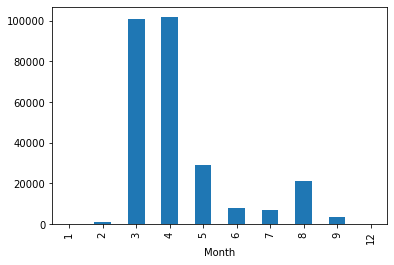

In [51]:
df_months.new_cases.plot(kind='bar')

# Data Visualization using Matplotlib and Seaborn

To being, lets import libraries from matplotlib.pyplot for basic plots like line and bar charts. 

The Seaborn Library will be used for more advanced plots and it is imported using alias sns

In [52]:
import matplotlib.pyplot as plt

In [53]:
import seaborn as sns

In [54]:
%matplotlib inline

The above code inline is written so as to show the outputs in the jupyter notebook itself.

Orelse the outputs will be shown in popup windows

 lets create a python list, showing the yield of apples over 6 years

In [55]:
yield_apples = [340,230,600,590,650,720]

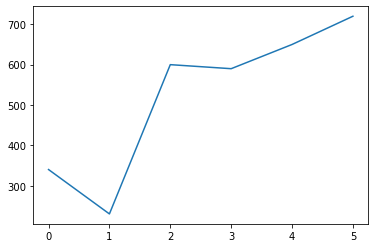

In [57]:
plt.plot(yield_apples);

The X axis is basically the index ofthe lists.

To avoid this, we can create a new list that contains the years and then map this with the yield

In [59]:
year = [2015,2016,2017,2018,2019,2020]

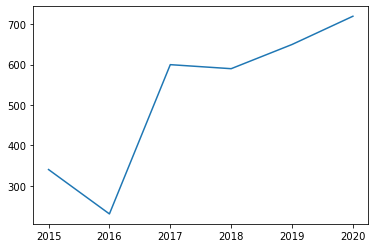

In [61]:
plt.plot(year,yield_apples);

The plt.plot() takes in two arguments, The first being x axis and other yaxis

Axis Lables using plt.xlabel and plt.ylabel functions

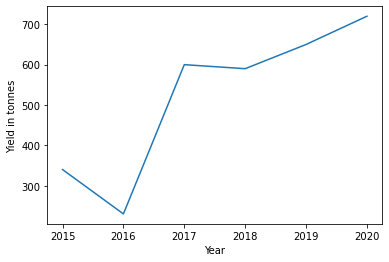

In [64]:
plt.plot(year,yield_apples)
plt.xlabel('Year')
plt.ylabel('Yield in tonnes');

Plotting Multiple Lines :)

In [65]:
yield_oranges = [350,380,400,380,420,410]

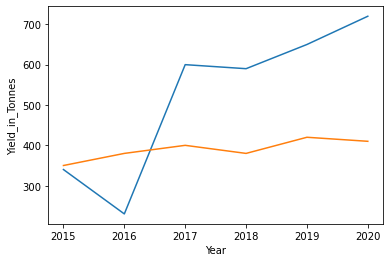

In [72]:
plt.plot(year,yield_apples)
plt.plot(year,yield_oranges)
plt.xlabel('Year')
plt.ylabel('Yield_in_Tonnes');

Chart title and legend

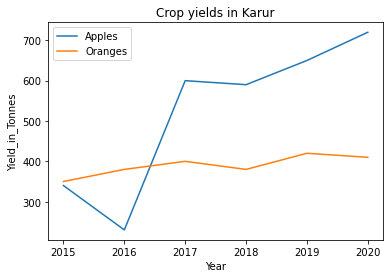

In [69]:
plt.plot(year,yield_apples)
plt.plot(year,yield_oranges)

plt.xlabel('Year')
plt.ylabel('Yield_in_Tonnes')

plt.title("Crop yields in Karur")
plt.legend(['Apples','Oranges']);



Line Markers

Markers on each of the lines in the plot can be used to understand the precise location of the datapoint.

It is done using the marker argument from plt.plot.

Matplot lib supports many different types of markers like circle,cross,square

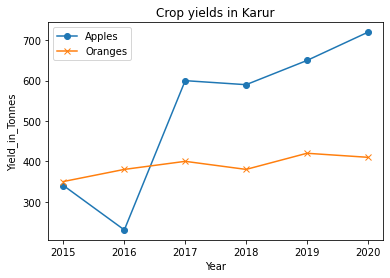

In [73]:
plt.plot(year,yield_apples,marker='o')
plt.plot(year,yield_oranges,marker='x')

plt.xlabel('Year')
plt.ylabel('Yield_in_Tonnes')

plt.title("Crop yields in Karur")
plt.legend(['Apples','Oranges']);

Styling Lines and Markers

The plt.plot function supports many arguments for styling lines and markers:
    
Color or c: set the color of the line

linestyle or ls: Choose between a solid and dashline
    
linewidth or lw: set the width of a line
    
markersize or ms: set the size of markers
    
markeredgecolor or mec: set the edge color for markers
    
markeredgewidth pr mew: set the edge width for markers
    
markerfacecolor or mfc: set the fill color for markers
    
alpha: Opacity of the plot

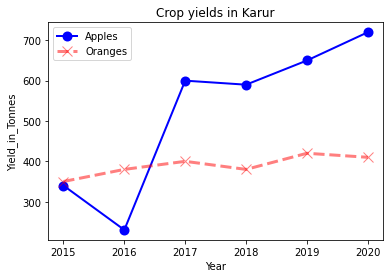

In [74]:
plt.plot(year,yield_apples,marker='o',c='b',ls='-',lw=2,ms=8,mew=2)
plt.plot(year,yield_oranges,marker='x',c='r',ls='--',lw=3,ms=10,alpha=0.5)

plt.xlabel('Year')
plt.ylabel('Yield_in_Tonnes')

plt.title("Crop yields in Karur")
plt.legend(['Apples','Oranges']);

About FMT Argument

The fmt argument provides a shorthand for specifying the linestyle, marker and color.

It can be provided in the thridargument as given as follows

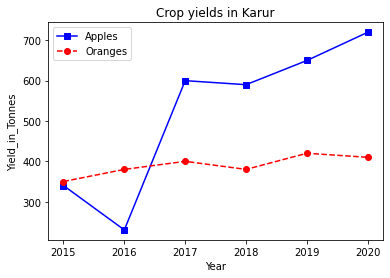

In [75]:
plt.plot(year,yield_apples,'s-b')
plt.plot(year,yield_oranges,'o--r')

plt.xlabel('Year')
plt.ylabel('Yield_in_Tonnes')

plt.title("Crop yields in Karur")
plt.legend(['Apples','Oranges']);

Changing the Size of the Figure

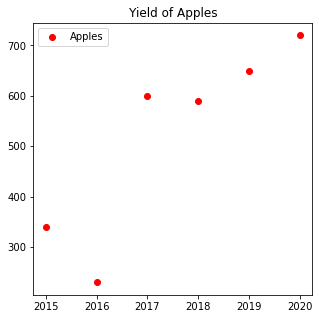

In [84]:
plt.figure(figsize=(5,5))

plt.plot(year,yield_apples,'or')
plt.title("Yield of Apples")
plt.legend(['Apples'])

Improving Default Styles using SeaBorn

In [85]:
sns.set_style("whitegrid")

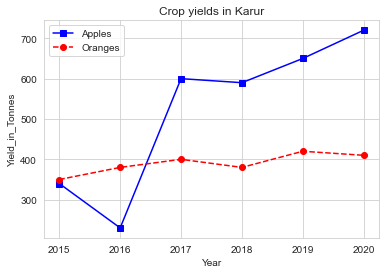

In [86]:
plt.plot(year,yield_apples,'s-b')
plt.plot(year,yield_oranges,'o--r')

plt.xlabel('Year')
plt.ylabel('Yield_in_Tonnes')

plt.title("Crop yields in Karur")
plt.legend(['Apples','Oranges']);

In [87]:
sns.set_style("darkgrid")

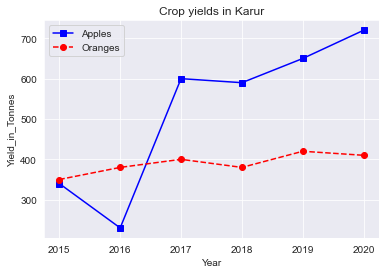

In [88]:
plt.plot(year,yield_apples,'s-b')
plt.plot(year,yield_oranges,'o--r')

plt.xlabel('Year')
plt.ylabel('Yield_in_Tonnes')

plt.title("Crop yields in Karur")
plt.legend(['Apples','Oranges']);

Chnaging the default values in matplotlib

In [90]:
import matplotlib as mlt

In [91]:
#mlt.rcparams['font.size'] = 14
#mlt.rcparams['figure.figsize'] = (9,5)
#mlt.rcparams['figure.facecolor'] = '#00000000'